In [2]:
import pandas as pd
import os,sys
print (os.getcwd())

# pd.set_option('display.height',1000)
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)


train_data = pd.read_csv("../../CreditCard/all/cs-training.csv")
train_data.rename(columns=({'Unnamed: 0': 'Id'}), inplace=True)
# print train_data['MonthlyIncome'].describe()
# print train_data.describe()


null_df = train_data[train_data.isnull().values==True]

null_df = train_data.count()
print (train_data.count())
print (train_data.corr())
print (train_data.cov())

colnull = pd.DataFrame(data={'colname':null_df.index, 'isnulls':null_df.values})
colnames = colnull.loc[colnull.isnulls==True,'colname']
print (colnames)



C:\Users\honglin.wang\PycharmProjects\ML\venv\Scripts


Id                                      150000
SeriousDlqin2yrs                        150000
RevolvingUtilizationOfUnsecuredLines    150000
age                                     150000
NumberOfTime30-59DaysPastDueNotWorse    150000
DebtRatio                               150000
MonthlyIncome                           120269
NumberOfOpenCreditLinesAndLoans         150000
NumberOfTimes90DaysLate                 150000
NumberRealEstateLoansOrLines            150000
NumberOfTime60-89DaysPastDueNotWorse    150000
NumberOfDependents                      146076
dtype: int64
                                            Id  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines       age  NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  NumberOfDependents
Id                                    1.000000          0.002801                              0.0023

                                                Id  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines          age  NumberOfTime30-59DaysPastDueNotWorse     DebtRatio  MonthlyIncome  NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  NumberOfDependents
Id                                    1.875012e+09         30.288309                          25648.248798  2816.328672                           -103.629774 -2.563944e+05   1.638636e+06                      1021.782432              -199.313349                    -32.556884                           -139.845039           -2.672215
SeriousDlqin2yrs                      3.028831e+01          0.062373                             -0.112369    -0.425681                              0.131506 -3.868993e+00  -7.222388e+01                        -0.038129                 0.122010                     -0.001986                              0.106120            0.012874
R

In [3]:
print (train_data.var())

Id                                      1.875012e+09
SeriousDlqin2yrs                        6.237283e-02
RevolvingUtilizationOfUnsecuredLines    6.237775e+04
age                                     2.182080e+02
NumberOfTime30-59DaysPastDueNotWorse    1.757941e+01
DebtRatio                               4.152704e+06
MonthlyIncome                           2.069189e+08
NumberOfOpenCreditLinesAndLoans         2.648081e+01
NumberOfTimes90DaysLate                 1.738309e+01
NumberRealEstateLoansOrLines            1.276382e+00
NumberOfTime60-89DaysPastDueNotWorse    1.726552e+01
NumberOfDependents                      1.243417e+00
dtype: float64


In [4]:
print (train_data.mean())

Id                                      75000.500000
SeriousDlqin2yrs                            0.066840
RevolvingUtilizationOfUnsecuredLines        6.048438
age                                        52.295207
NumberOfTime30-59DaysPastDueNotWorse        0.421033
DebtRatio                                 353.005076
MonthlyIncome                            6670.221237
NumberOfOpenCreditLinesAndLoans             8.452760
NumberOfTimes90DaysLate                     0.265973
NumberRealEstateLoansOrLines                1.018240
NumberOfTime60-89DaysPastDueNotWorse        0.240387
NumberOfDependents                          0.757222
dtype: float64


In [5]:
print (train_data.dropna().drop_duplicates().count())

Id                                      120269
SeriousDlqin2yrs                        120269
RevolvingUtilizationOfUnsecuredLines    120269
age                                     120269
NumberOfTime30-59DaysPastDueNotWorse    120269
DebtRatio                               120269
MonthlyIncome                           120269
NumberOfOpenCreditLinesAndLoans         120269
NumberOfTimes90DaysLate                 120269
NumberRealEstateLoansOrLines            120269
NumberOfTime60-89DaysPastDueNotWorse    120269
NumberOfDependents                      120269
dtype: int64


In [6]:
input_data = train_data.dropna().drop_duplicates()
# print (input_data.head())

# fit value for MonthlyIncome feature
process_df = train_data
process_df = process_df.iloc[:,[6,1,2,3,4,5,7,8,9,10]]
print (process_df.head())
known = process_df[process_df.MonthlyIncome.notnull()].as_matrix()
unknown = process_df[process_df.MonthlyIncome.isnull()].as_matrix()
# print (known)
# print (len(unknown))
X = known[:,1:]
y = known[:,0]

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score,mean_squared_error

rfr = RandomForestRegressor(n_estimators=200,max_depth=5,random_state=0,n_jobs=-1)
rfr.fit(X,y)
predicted = rfr.predict(unknown[:,1:]).round(0)
print (predicted)
print '%s  %s' %(predicted.ndim,predicted.size)

mse = mean_squared_error(y,rfr.predict(X))
print (mse)

# print (process_df.loc[process_df.MonthlyIncome.isnull(),'MonthlyIncome'])
process_df.loc[process_df.MonthlyIncome.isnull(),'MonthlyIncome'] = predicted










   MonthlyIncome  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse
0         9120.0                 1                              0.766127   45                                     2   0.802982                               13                        0                             6                                     0
1         2600.0                 0                              0.957151   40                                     0   0.121876                                4                        0                             0                                     0
2         3042.0                 0                              0.658180   38                                     1   0.085113                                2                        1                             0                           

c:\users\honglin.wang\pycharmprojects\ml\venv\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
c:\users\honglin.wang\pycharmprojects\ml\venv\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


[4748.   56. 4580. ...  276. 1235. 1235.]
1  29731


79699604.70338058


c:\users\honglin.wang\pycharmprojects\ml\venv\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


MonthlyIncome                           150000
SeriousDlqin2yrs                        150000
RevolvingUtilizationOfUnsecuredLines    150000
age                                     150000
NumberOfTime30-59DaysPastDueNotWorse    150000
DebtRatio                               150000
NumberOfOpenCreditLinesAndLoans         150000
NumberOfTimes90DaysLate                 150000
NumberRealEstateLoansOrLines            150000
NumberOfTime60-89DaysPastDueNotWorse    150000
dtype: int64
count    150000.000000
mean          0.265973
std           4.169304
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: NumberOfTimes90DaysLate, dtype: float64


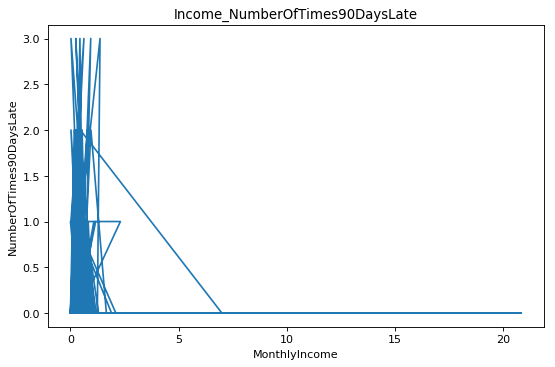

In [9]:
print (process_df.count())
import matplotlib.pyplot as plt

print (process_df['NumberOfTimes90DaysLate'].describe())
fig,ax = plt.subplots(figsize = (8,5) , dpi = 80)
process_df_head = process_df.head(1000)
ax.plot(process_df_head["MonthlyIncome"]/10000 , process_df_head["NumberOfTimes90DaysLate"])
ax.set(xlabel = "MonthlyIncome" , ylabel = "NumberOfTimes90DaysLate" ,title = "Income_NumberOfTimes90DaysLate")

plt.show()





In [9]:

print (process_df.count())

MonthlyIncome                           150000
SeriousDlqin2yrs                        150000
RevolvingUtilizationOfUnsecuredLines    150000
age                                     150000
NumberOfTime30-59DaysPastDueNotWorse    150000
DebtRatio                               150000
NumberOfOpenCreditLinesAndLoans         150000
NumberOfTimes90DaysLate                 150000
NumberRealEstateLoansOrLines            150000
NumberOfTime60-89DaysPastDueNotWorse    150000
dtype: int64


In [11]:

import matplotlib.pyplot as plt
print (process_df.columns.values.tolist())
columns = process_df.columns.values.tolist()

age = process_df['age']
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.boxplot([age])
ax.set_xticklabels(['age'])

invalids= process_df[(process_df['age']>100) 
                          | (process_df['age'] <= 0) 
                          | (process_df['RevolvingUtilizationOfUnsecuredLines'] >= 1) 
                          | (process_df['DebtRatio'] >= 1)
                          | (process_df['NumberOfTime30-59DaysPastDueNotWorse'] > 95) 
                          | (process_df['NumberOfTime60-89DaysPastDueNotWorse'] > 95) 
                          | (process_df['NumberOfTimes90DaysLate'] > 95)].index
print (len(invalids))
removed_df = process_df.drop(invalids,axis=0)

print (removed_df.head())



['MonthlyIncome', 'SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse']
38227
   MonthlyIncome  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse
0         9120.0                 1                              0.766127   45                                     2   0.802982                               13                        0                             6                                     0
1         2600.0                 0                              0.957151   40                                     0   0.121876                                4                        0                             0  

In [12]:
import matplotlib.pyplot as plt
grouped = removed_df['SeriousDlqin2yrs'].groupby(removed_df['SeriousDlqin2yrs']).count()
print (float(grouped[1])/grouped[0])
print (grouped)


# grouped.plot('bar')
# plt.show()

0.06324911533046687
SeriousDlqin2yrs
0    105124
1      6649
Name: SeriousDlqin2yrs, dtype: int64


   MonthlyIncome  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse
0         9120.0                 1                              0.766127   45                                     2   0.802982                               13                        0                             6                                     0
1         2600.0                 0                              0.957151   40                                     0   0.121876                                4                        0                             0                                     0
2         3042.0                 0                              0.658180   38                                     1   0.085113                                2                        1                             0                           

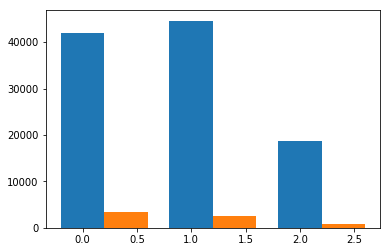

In [13]:

import matplotlib.pyplot as plt

# age and bad ratio correlation
# grouped = removed_df['age'].groupby(removed_df['age']).count()
# print (grouped.index.tolist())
# print (grouped[21],grouped[97],grouped[80])
# xlabels = grouped.index.tolist()
# bad_ratio = []
# for age in xlabels:
#     bad_user_cnt = len(removed_df[(removed_df['age'] == age) & (removed_df['SeriousDlqin2yrs'] == 1)])
#     bad_ratio.append(float(bad_user_cnt)/grouped[age])
# print (bad_ratio)
# 
# plt.plot(xlabels, bad_ratio,"-", color = "r")
# plt.show()

# monthlyIncome and bad ratio correlation
print (removed_df.head())
grouped = removed_df['MonthlyIncome'].groupby(removed_df['MonthlyIncome']).count()

# plt.plot(grouped.index, grouped.values,"-", color = "r")
# plt.show()
print (grouped.index.tolist()[1:100])
incomes = grouped.index.tolist()
bad_users = []
good_users = []
bad_users_5k = 0
good_users_5k = 0 
bad_users_10k = 0
good_users_10k = 0 
bad_users_other = 0
good_users_other = 0 
for income in incomes:
    if income < 5000:
        bad_user_cnt = len(removed_df[(removed_df['MonthlyIncome'] == income) & (removed_df['SeriousDlqin2yrs'] == 1)])
        bad_users_5k += bad_user_cnt
        good_users_5k += (grouped[income] - bad_user_cnt)
    elif income < 10000:
        bad_user_cnt = len(removed_df[(removed_df['MonthlyIncome'] == income) & (removed_df['SeriousDlqin2yrs'] == 1)])
        bad_users_10k += bad_user_cnt
        good_users_10k += (grouped[income] - bad_user_cnt)
    else:
        bad_user_cnt = len(removed_df[(removed_df['MonthlyIncome'] == income) & (removed_df['SeriousDlqin2yrs'] == 1)])
        bad_users_other += bad_user_cnt
        good_users_other += (grouped[income] - bad_user_cnt)

good_num_list = [good_users_5k,good_users_10k,good_users_other]
bad_num_list = [bad_users_5k,bad_users_10k,bad_users_other]

x = list(range(len(bad_num_list)))
plt.bar(x,good_num_list,width=0.4)
for i in range(len(x)):
    x[i] = x[i] + 0.4
plt.bar(x,bad_num_list,width=0.4)
plt.show()



                                      MonthlyIncome  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines       age  NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse
MonthlyIncome                              1.000000         -0.016319                             -0.031866  0.034161                              0.001567  -0.048272                         0.093975                -0.019692                      0.136240                             -0.009702
SeriousDlqin2yrs                          -0.016319          1.000000                              0.236780 -0.096731                              0.242944   0.060364                        -0.025901                 0.296840                     -0.012102                              0.237548
RevolvingUtilizationOfUnsecuredLines      -0.031866          0.236780                              1.000000 -0.259180    

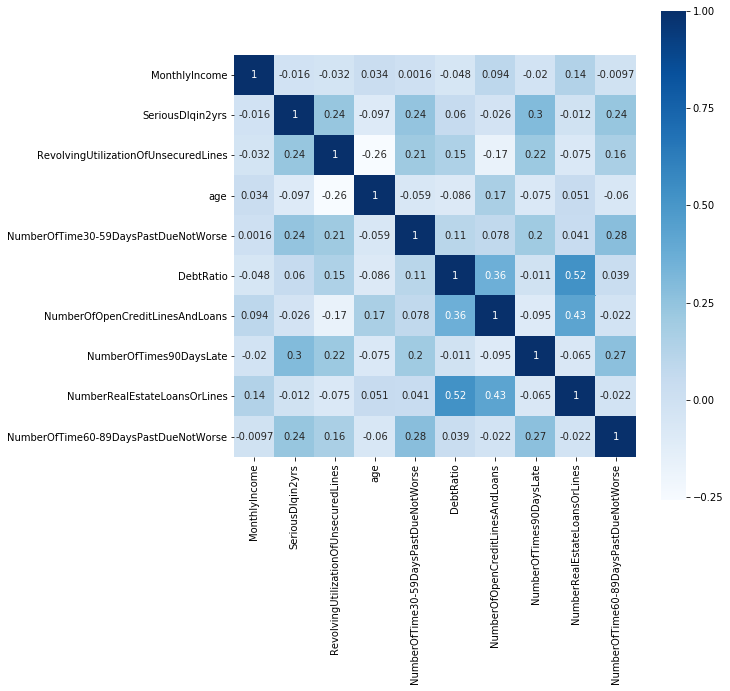

In [14]:

print (removed_df.corr())
import seaborn as sns

dfData = removed_df.corr()
plt.subplots(figsize=(9, 9)) 
sns.heatmap(dfData, annot=True, vmax=1, square=True, cmap="Blues")
# plt.savefig('./BluesStateRelation.png')
plt.show()


In [31]:


# feanture selection :  to calculate the feature importance with random forest model
Y = removed_df['SeriousDlqin2yrs'].as_matrix()
cols = [i for i in removed_df.columns if i not in ['SeriousDlqin2yrs']]
X = removed_df[cols].as_matrix()
print (X)
print (Y)
names = cols
print (names)
rf = RandomForestRegressor()
rf.fit(X, Y)
print "Features sorted by their score:"
print sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names),reverse=True)





c:\users\honglin.wang\pycharmprojects\ml\venv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
c:\users\honglin.wang\pycharmprojects\ml\venv\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


[[9.12000000e+03 7.66126609e-01 4.50000000e+01 ... 0.00000000e+00
  6.00000000e+00 0.00000000e+00]
 [2.60000000e+03 9.57151019e-01 4.00000000e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.04200000e+03 6.58180140e-01 3.80000000e+01 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [5.58400000e+03 2.99745148e-01 4.40000000e+01 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [5.71600000e+03 0.00000000e+00 3.00000000e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.15800000e+03 8.50282951e-01 6.40000000e+01 ... 0.00000000e+00
  2.00000000e+00 0.00000000e+00]]
[1 0 0 ... 0 0 0]
['MonthlyIncome', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse']


Features sorted by their score:
[(0.2131, 'DebtRatio'), (0.1901, 'RevolvingUtilizationOfUnsecuredLines'), (0.1897, 'MonthlyIncome'), (0.1244, 'age'), (0.1073, 'NumberOfTimes90DaysLate'), (0.0861, 'NumberOfOpenCreditLinesAndLoans'), (0.0345, 'NumberOfTime30-59DaysPastDueNotWorse'), (0.0297, 'NumberRealEstateLoansOrLines'), (0.0254, 'NumberOfTime60-89DaysPastDueNotWorse')]


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from collections import defaultdict
import numpy as np

# feanture selection :  to calculate the feature importance with random forest model 
#  Mean decrease accuracy
Y = removed_df['SeriousDlqin2yrs'].as_matrix()
cols = [i for i in removed_df.columns if i not in ['SeriousDlqin2yrs']]
X = removed_df[cols].as_matrix()
print (X)
print (Y)
# names = cols
# print (names)
rf = RandomForestRegressor()
scores = defaultdict(list)

#crossvalidate the scores on a number of different random splits of the data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.4, random_state=0)

r = rf.fit(X_train, Y_train)
acc = r2_score(Y_test, rf.predict(X_test))
for i in range(X.shape[1]):
    X_t = X_test.copy()
    np.random.shuffle(X_t[:, i])
    shuff_acc = r2_score(Y_test, rf.predict(X_t))
    scores[names[i]].append((acc-shuff_acc)/acc)
print "Features sorted by their score:"
print sorted([(round(np.mean(score), 4), feat) for
              feat, score in scores.items()], reverse=True)




c:\users\honglin.wang\pycharmprojects\ml\venv\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
c:\users\honglin.wang\pycharmprojects\ml\venv\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


[[9.12000000e+03 7.66126609e-01 4.50000000e+01 ... 0.00000000e+00
  6.00000000e+00 0.00000000e+00]
 [2.60000000e+03 9.57151019e-01 4.00000000e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.04200000e+03 6.58180140e-01 3.80000000e+01 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [5.58400000e+03 2.99745148e-01 4.40000000e+01 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [5.71600000e+03 0.00000000e+00 3.00000000e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.15800000e+03 8.50282951e-01 6.40000000e+01 ... 0.00000000e+00
  2.00000000e+00 0.00000000e+00]]
[1 0 0 ... 0 0 0]


Features sorted by their score:
[(2.4427, 'NumberOfTimes90DaysLate'), (1.3503, 'NumberOfOpenCreditLinesAndLoans'), (1.3268, 'RevolvingUtilizationOfUnsecuredLines'), (1.1697, 'NumberOfTime30-59DaysPastDueNotWorse'), (0.9919, 'age'), (0.9612, 'DebtRatio'), (0.8731, 'NumberOfTime60-89DaysPastDueNotWorse'), (0.8726, 'MonthlyIncome'), (0.4122, 'NumberRealEstateLoansOrLines')]


In [41]:

from sklearn.linear_model import (LinearRegression, Ridge, 
                                  Lasso, RandomizedLasso)
from sklearn.feature_selection import RFE, f_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from minepy import MINE

# np.random.seed(0)
# 
# size = 750
# X = np.random.uniform(0, 1, (size, 14))
# 
# #"Friedamn #1” regression problem
# Y = (10 * np.sin(np.pi*X[:,0]*X[:,1]) + 20*(X[:,2] - .5)**2 +
#      10*X[:,3] + 5*X[:,4] + np.random.normal(0,1))
# #Add 3 additional correlated variables (correlated with X1-X3)
# X[:,10:] = X[:,:4] + np.random.normal(0, .025, (size,4))
# 
# names = ["x%s" % i for i in range(1,15)]

# full picture feanture selection
Y = removed_df['SeriousDlqin2yrs'].as_matrix()
cols = [i for i in removed_df.columns if i not in ['SeriousDlqin2yrs']]
X = removed_df[cols].as_matrix()
print (X)
print (Y)
names = cols


ranks = {}

def rank_to_dict(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x, 2), ranks)
    return dict(zip(names, ranks ))

lr = LinearRegression(normalize=True)
lr.fit(X, Y)
ranks["Linear reg"] = rank_to_dict(np.abs(lr.coef_), names)

exit(0)

ridge = Ridge(alpha=7)
ridge.fit(X, Y)
ranks["Ridge"] = rank_to_dict(np.abs(ridge.coef_), names)


lasso = Lasso(alpha=.05)
lasso.fit(X, Y)
ranks["Lasso"] = rank_to_dict(np.abs(lasso.coef_), names)


rlasso = RandomizedLasso(alpha=0.04)
rlasso.fit(X, Y)
ranks["Stability"] = rank_to_dict(np.abs(rlasso.scores_), names)

#stop the search when 5 features are left (they will get equal scores)
rfe = RFE(lr, n_features_to_select=5)
rfe.fit(X,Y)
ranks["RFE"] = rank_to_dict(map(float, rfe.ranking_), names, order=-1)

rf = RandomForestRegressor()
rf.fit(X,Y)
ranks["RF"] = rank_to_dict(rf.feature_importances_, names)


f, pval  = f_regression(X, Y, center=True)
ranks["Corr."] = rank_to_dict(f, names)

mine = MINE()
mic_scores = []
for i in range(X.shape[1]):
    mine.compute_score(X[:,i], Y)
    m = mine.mic()
    mic_scores.append(m)

ranks["MIC"] = rank_to_dict(mic_scores, names)


r = {}
for name in names:
    r[name] = round(np.mean([ranks[method][name] 
                             for method in ranks.keys()]), 2)

methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")

print "\t%s" % "\t".join(methods)
for name in names:
    print "%s\t%s" % (name, "\t".join(map(str, 
                         [ranks[method][name] for method in methods])))
    

ImportError: No module named minepy

In [17]:

# split bins

cut1 = pd.qcut(removed_df['RevolvingUtilizationOfUnsecuredLines'],6,labels=False)
cut2 = pd.qcut(removed_df['age'],6,labels=False)



111773
111773
